# Módulo 2: Matemáticas y estadística - Ejercicio de evaluación

### 1: Importación de librerías y carga de datos

Se importan varias librerías útiles para el análisis de datos y la visualización:

- numpy: Para operaciones numéricas, como el cálculo de medias, medianas, varianzas, etc.
- matplotlib.pyplot: Para generar gráficos estáticos, como histogramas y diagramas de dispersión.
- scipy.stats: Para realizar pruebas estadísticas, como la prueba t y el cálculo de estadísticas como la asimetría y curtosis.
- seaborn: Para crear gráficos más atractivos y fáciles de interpretar (por ejemplo, distribuciones y correlaciones).
- collections.Counter: Para contar la frecuencia de los elementos de un conjunto (en este caso, direcciones).

Se usa np.genfromtxt para cargar datos desde un archivo CSV. El parámetro encoding='utf-8-sig' asegura que el archivo se lea correctamente, incluso si contiene un BOM (Byte Order Mark), común en archivos creados en algunas aplicaciones (como Excel). La opción names=True permite que los nombres de las columnas sean interpretados automáticamente desde la primera fila del archivo CSV.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import Counter

# Cargar datos desde archivo CSV con encoding 'utf-8-sig' para eliminar BOM
filename = '../Data/idealista_madrid.csv'
data = np.genfromtxt(filename, delimiter=',', dtype=None, encoding='utf-8-sig', names=True)

### 2: Verificación de columnas y conversión de datos

Explicación:

- Se verifica que los nombres de las columnas se hayan detectado correctamente al cargar los datos. data.dtype.names devuelve los nombres de las columnas.
- Luego, se accede a cada una de las columnas relevantes del archivo (price, baths, rooms, sqft) y se convierten a tipo de datos float para asegurar que puedan ser manipuladas numéricamente.
- En el caso de la columna address, se limpia eliminando la parte ", Madrid", que es redundante y no aportará valor al análisis.

In [7]:
# Verificar nombres de las columnas
print("Nombres de las columnas detectadas:", data.dtype.names)

# Renombrar y convertir columnas según nombres detectados
price = data['price'].astype(float)
baths = data['baths'].astype(float)
rooms = data['rooms'].astype(float)
sqft = data['sqft'].astype(float)
addresses = np.char.replace(data['address'], ', Madrid', '')  # Limpiar ", Madrid"

Nombres de las columnas detectadas: ('price', 'baths', 'rooms', 'sqft', 'address')


### 3: Estadísticas descriptivas básicas

Se calculan y muestran las estadísticas descriptivas más comunes para las columnas numéricas:
- Media: El promedio aritmético de los valores de la columna.
- Mediana: El valor central que divide a los datos en dos partes iguales. Es menos sensible a los valores extremos o "outliers".
- Máximo y Mínimo: El valor más alto y el más bajo de cada columna, respectivamente.
- Estas estadísticas ayudan a comprender la distribución general de los datos y proporcionan un panorama inicial de las propiedades analizadas.

In [8]:
# Estadísticas descriptivas básicas
print("\nMedia:")
print(f"Price: {np.mean(price):.2f}, Baths: {np.mean(baths):.2f}, Rooms: {np.mean(rooms):.2f}, Sqft: {np.mean(sqft):.2f}")
print("\nMediana:")
print(f"Price: {np.median(price):.2f}, Baths: {np.median(baths):.2f}, Rooms: {np.median(rooms):.2f}, Sqft: {np.median(sqft):.2f}")
print("\nMáximo y Mínimo:")
print(f"Price: {np.max(price):.2f} / {np.min(price):.2f}, Baths: {np.max(baths):.2f} / {np.min(baths):.2f}, Rooms: {np.max(rooms):.2f} / {np.min(rooms):.2f}")


Media:
Price: 1290575.26, Baths: 2.90, Rooms: 3.47, Sqft: 217.24

Mediana:
Price: 990000.00, Baths: 3.00, Rooms: 3.00, Sqft: 158.00

Máximo y Mínimo:
Price: 8900000.00 / 122000.00, Baths: 12.00 / 1.00, Rooms: 12.00 / 0.00


### 4: Visualización de histogramas y curvas de densidad

Explicación:

- Se crea un histograma y una curva de densidad para cada una de las variables numéricas.
- Histograma: Muestra la distribución de los datos dividiéndolos en intervalos o "bins". Ayuda a visualizar cómo se distribuyen los valores a lo largo del rango de datos.
- Curva de densidad: Es una estimación suavizada de la distribución de los datos, lo que facilita la visualización de patrones, como la simetría o el sesgo de la distribución.
- sns.histplot combina ambos elementos, haciendo que el análisis de la distribución sea más fácil de interpretar.

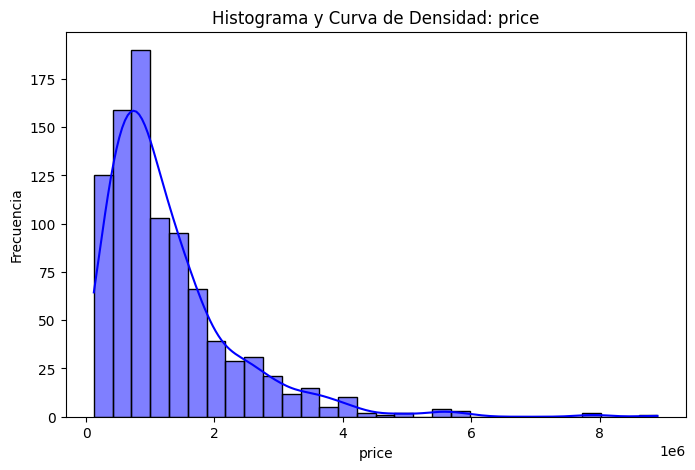

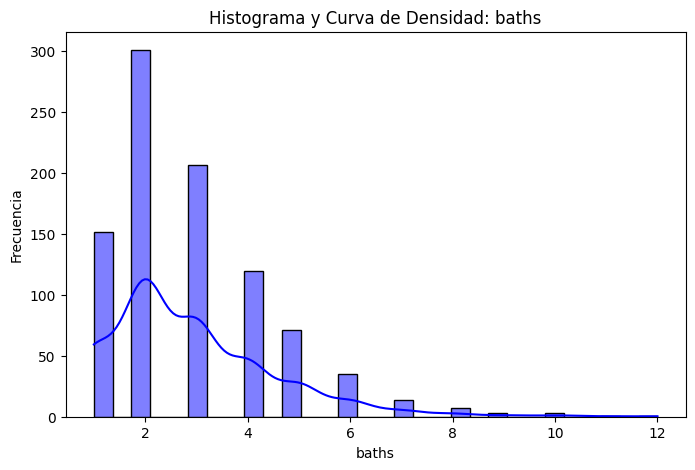

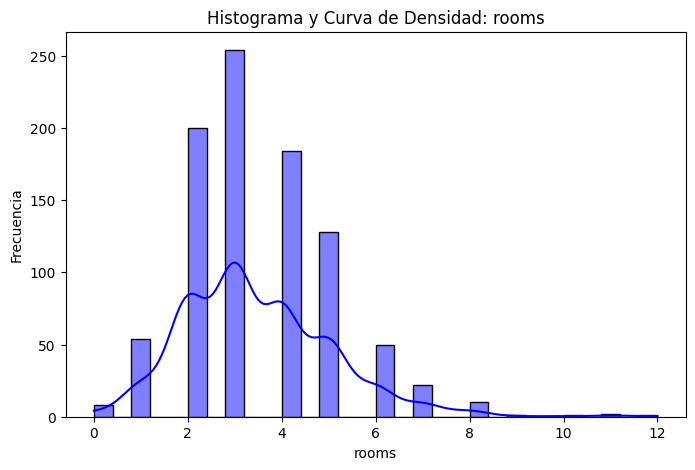

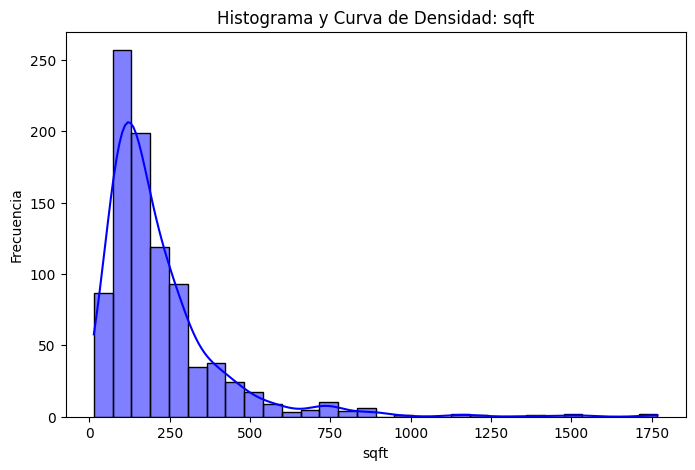

In [4]:
# Histograma y curva de densidad
numeric_cols = {'price': price, 'baths': baths, 'rooms': rooms, 'sqft': sqft}

for col_name, col_data in numeric_cols.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(col_data, kde=True, bins=30, color='blue')
    plt.title(f"Histograma y Curva de Densidad: {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frecuencia")
    plt.show()

### 5: Cálculo de cuartiles y rango intercuartílico (IQR)

Los cuartiles dividen los datos en cuatro partes iguales:
-  Q1: El primer cuartil (25%) es el valor por debajo del cual se encuentra el 25% de los datos.
- Q2: La mediana (50%) es el valor central.
- Q3: El tercer cuartil (75%) es el valor por debajo del cual se encuentra el 75% de los datos.

El rango intercuartílico (IQR) es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Este valor es útil para identificar la dispersión de los datos y para detectar posibles outliers.

Estas métricas proporcionan una visión más detallada de la distribución de los datos, especialmente si hay valores atípicos.

In [5]:
# Cuartiles y rango intercuartílico (IQR)
for col_name, col_data in numeric_cols.items():
    Q1 = np.percentile(col_data, 25)
    Q2 = np.percentile(col_data, 50)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1
    print(f"\n{col_name} - Cuartiles y IQR:")
    print(f"Q1: {Q1:.2f}, Q2 (mediana): {Q2:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")


price - Cuartiles y IQR:
Q1: 625000.00, Q2 (mediana): 990000.00, Q3: 1650000.00, IQR: 1025000.00

baths - Cuartiles y IQR:
Q1: 2.00, Q2 (mediana): 3.00, Q3: 4.00, IQR: 2.00

rooms - Cuartiles y IQR:
Q1: 2.00, Q2 (mediana): 3.00, Q3: 4.00, IQR: 2.00

sqft - Cuartiles y IQR:
Q1: 104.00, Q2 (mediana): 158.00, Q3: 264.00, IQR: 160.00


### 6: Filtrar 20% más caro y más barato

Explicación:
- Los precios son ordenados de menor a mayor usando np.sort.
- Se selecciona el 20% más caro tomando los últimos valores del arreglo ordenado (price_20_percent_high) y el 20% más barato tomando los primeros valores (price_20_percent_low).
- Esto permite analizar cómo se distribuyen los precios en las franjas más altas y más bajas, lo cual puede ser útil para determinar si hay una concentración de precios en ciertos rangos.

In [6]:
# Filtrar el 20% más caro y el 20% más barato
price_sorted = np.sort(price)
price_20_percent_high = price_sorted[int(0.8 * len(price_sorted)):]  # 20% más caro
price_20_percent_low = price_sorted[:int(0.2 * len(price_sorted))]   # 20% más barato

print(f"\n20% más caro: {price_20_percent_high[:5]}...")
print(f"20% más barato: {price_20_percent_low[:5]}...")


20% más caro: [1850000. 1850000. 1850000. 1850000. 1850000.]...
20% más barato: [122000. 125000. 132000. 137000. 140000.]...


### 7: Moda de las direcciones

Explicación:

- Se utiliza Counter de la librería collections para contar cuántas veces aparece cada dirección en los datos.
- La función most_common(5) devuelve las 5 direcciones más frecuentes. Esto es útil para identificar zonas con alta concentración de propiedades.
- La moda es la medida de tendencia central más adecuada para variables cualitativas (como las direcciones).

In [7]:
# Convertir a cadenas con map
addresses = np.char.replace(data['address'], ', Madrid', '')  # Limpiar ", Madrid"
addresses = list(map(str, addresses))  # Usar map para convertir a str

# Moda de la columna address
address_counts = Counter(addresses)
most_common_addresses = address_counts.most_common(5)

# Imprimir las direcciones de manera limpia
print(f"\nModa de las direcciones: {[(address, count) for address, count in most_common_addresses]}")


Moda de las direcciones: [('Barrio de Salamanca', 63), ('Hortaleza', 60), ('Chamartín', 54), ('Moncloa', 48), ('Centro', 47)]


### 8: Cálculo de dispersión (varianza y desviación estándar)

Explicación:

- La varianza mide la dispersión de los datos respecto a la media, indicando qué tan extendidos están los valores.
- La desviación estándar es la raíz cuadrada de la varianza y tiene la ventaja de estar en las mismas unidades que los datos originales.
- Estas medidas permiten evaluar cuán variables son las características de las propiedades (por ejemplo, si los precios son homogéneos o si hay mucha dispersión).

In [8]:
# Dispersión: varianza y desviación estándar
for col_name, col_data in numeric_cols.items():
    variance = np.var(col_data)
    std_deviation = np.std(col_data)
    print(f"\n{col_name} - Varianza: {variance:.2f}, Desviación estándar: {std_deviation:.2f}")


price - Varianza: 1073448095137.26, Desviación estándar: 1036073.40

baths - Varianza: 2.64, Desviación estándar: 1.63

rooms - Varianza: 2.54, Desviación estándar: 1.59

sqft - Varianza: 36726.28, Desviación estándar: 191.64


### 9: Correlación entre variables

Explicación:

- La correlación mide la relación entre dos variables. La matriz de correlación muestra cómo se relacionan todas las variables entre sí.
- El sns.heatmap crea un gráfico visual de la matriz de correlación, con los colores indicando la intensidad de la relación (rojo para alta correlación positiva, azul para alta correlación negativa).
- Es útil para identificar relaciones significativas, como la posible correlación entre el precio y el número de baños o metros cuadrados.

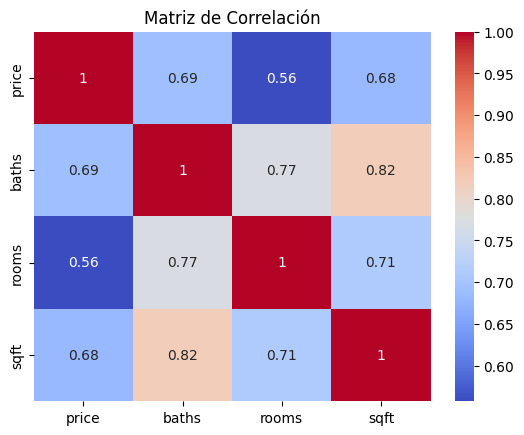

In [9]:
# Correlación entre las variables
corr_matrix = np.corrcoef([price, baths, rooms, sqft])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['price', 'baths', 'rooms', 'sqft'], yticklabels=['price', 'baths', 'rooms', 'sqft'])
plt.title("Matriz de Correlación")
plt.show()

### 10: Detección de outliers (Tukey y Z-score), asimetría y curtosis

Outliers: Son valores atípicos que se desvían significativamente del resto de los datos.

- Se utilizan dos métodos para detectarlos:
- Tukey: Usa el IQR para determinar los límites inferior y superior. Los valores fuera de estos límites se consideran outliers.
- Z-score: Calcula la distancia de un valor respecto a la media en términos de desviaciones estándar. Un Z-score mayor a 3 generalmente indica un outlier.

Asimetría y Curtosis:

- Asimetría: Mide la simetría de la distribución de los datos. Si es negativa, la distribución está sesgada a la izquierda; si es positiva, a la derecha.
- Curtosis: Mide la forma de las colas de la distribución. Una curtosis mayor a 3 indica colas más gruesas que una distribución normal.
Ambos valores ayudan a comprender cómo se distribuyen los datos.

In [10]:
# Filtro de outliers: Tukey y Z-score
def tukey_outliers(col_data):
    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return (col_data < lower_limit) | (col_data > upper_limit)

# Z-score: Definir límite
z_threshold = 3
z_scores = np.abs(stats.zscore(numeric_cols['price']))
outliers_z = z_scores > z_threshold

# Detectar outliers
outliers_tukey_price = tukey_outliers(price)
outliers_z_price = outliers_z

# Mostrar resultados
print("\nOutliers (Tukey) en Price:", price[outliers_tukey_price][:5])
print("Outliers (Z-score) en Price:", price[outliers_z_price][:5])

# Asimetría y Curtosis
for col_name, col_data in numeric_cols.items():
    skewness = stats.skew(col_data)
    kurtosis = stats.kurtosis(col_data)
    print(f"\n{col_name} - Asimetría: {skewness:.2f}, Curtosis: {kurtosis:.2f}")


Outliers (Tukey) en Price: [5700000. 3950000. 3900000. 4950000. 7900000.]
Outliers (Z-score) en Price: [5700000. 4950000. 7900000. 5500000. 5500000.]

price - Asimetría: 2.30, Curtosis: 8.55

baths - Asimetría: 1.41, Curtosis: 3.04

rooms - Asimetría: 0.88, Curtosis: 1.90

sqft - Asimetría: 3.36, Curtosis: 17.23


### 11: Transformación logarítmica y verificación de asimetría

Transformación logarítmica:

- Se aplica una transformación logarítmica a la columna price usando np.log(price). La transformación logarítmica se utiliza comúnmente para reducir el sesgo en distribuciones de datos muy sesgadas. En particular, cuando los precios tienen una distribución asimétrica (como suele ocurrir en datos inmobiliarios), aplicar el logaritmo puede hacer que la distribución sea más simétrica, lo que facilita su análisis y la validación de modelos estadísticos.
- La fórmula matemática es log(x), que transforma los datos de tal manera que los valores más grandes se "comprimen" y se reduce la influencia de los valores extremos.

Verificación de la asimetría después de la transformación:

- Después de aplicar la transformación logarítmica, se verifica la asimetría de la nueva distribución utilizando stats.skew(price_transformed). La asimetría mide la simetría de una distribución:
- Si la asimetría es cercana a 0, la distribución es casi simétrica.
- Si es negativa, la distribución está sesgada hacia la izquierda.
- Si es positiva, la distribución está sesgada hacia la derecha.
- En este caso, se espera que la asimetría de los precios transformados sea menor (es decir, que la distribución se vuelva más simétrica) después de aplicar el logaritmo, comparado con la distribución original.

In [11]:
# Transformación logarítmica (para distribuciones sesgadas)
price_transformed = np.log(price)

# Verificación de asimetría después de la transformación
price_skewness_transformed = stats.skew(price_transformed)
print(f"\nAsimetría de Price (transformado): {price_skewness_transformed:.2f}")


Asimetría de Price (transformado): -0.12


### 12:  Contraste de hipótesis sobre precios

Objetivo del análisis:
- El objetivo de esta parte del código es comparar los precios de casas que tienen 3 o más baños con las casas que tienen entre 1 y 2 baños. Esto se realiza utilizando una prueba t de Student, que nos permite verificar si hay una diferencia estadísticamente significativa en los precios entre estos dos grupos.

División de los datos según el número de baños:

- Primero, se crea un subconjunto de datos de precios según la cantidad de baños en las propiedades.
- baths_3_or_more = price[baths >= 3]: Esto selecciona los precios de las casas que tienen 3 o más baños.
- baths_1_or_2 = price[baths < 3]: Esto selecciona los precios de las casas que tienen entre 1 y 2 baños.

Ahora, tenemos dos grupos de precios: uno para casas con 3 o más baños, y otro para casas con 1-2 baños.

Prueba t de Student:

- La prueba t de Student se utiliza para comparar las medias de dos grupos independientes (en este caso, los precios de casas con diferentes números de baños).
- t_stat, p_value = stats.ttest_ind(baths_3_or_more, baths_1_or_2): Aquí se realiza la prueba t de Student con los dos grupos de precios. El resultado de esta prueba proporciona dos valores:

1. t-statistic (t_stat): Es la estadística t calculada. Representa la diferencia entre las medias de los dos grupos en comparación con la variabilidad dentro de cada grupo. Un valor t alto sugiere una diferencia notable entre las medias de los grupos.
2. p-value (p_value): Es el valor p asociado con la prueba. El valor p indica la probabilidad de obtener una diferencia tan extrema entre los grupos si la hipótesis nula es verdadera. La hipótesis nula generalmente establece que no hay diferencia significativa entre las medias de los dos grupos.

Interpretación del valor p:

- Después de realizar la prueba, el código imprime el valor de la estadística t y el valor p.

- Se toma una decisión sobre la hipótesis usando el valor p:

1. Si p-value < 0.05, se rechaza la hipótesis nula (H0), lo que significa que hay evidencia suficiente para concluir que las casas con 3 o más baños tienen un precio significativamente diferente (más alto, en este caso) que las casas con 1-2 baños.
2. Si p-value >= 0.05, no se rechaza la hipótesis nula, lo que sugiere que no hay evidencia suficiente para afirmar que los precios de las casas con 3 o más baños son significativamente diferentes de los de las casas con 1-2 baños.

Conclusión:

- Si se rechaza la hipótesis nula, se concluye que las casas con 3 o más baños son significativamente más caras que las casas con 1 o 2 baños.
- Si no se rechaza la hipótesis nula, se concluye que no hay diferencia significativa en los precios entre los dos grupos.

In [12]:
# Dividir por número de baños
baths_3_or_more = price[baths >= 3]
baths_1_or_2 = price[baths < 3]

# Prueba t de Student
t_stat, p_value = stats.ttest_ind(baths_3_or_more, baths_1_or_2)

print(f"\nPrueba t de Student - Precio de casas con 3 o más baños vs 1-2 baños:")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.3f}")

# Si p-value < 0.05, rechazamos H0 (hipótesis nula) y concluimos que hay diferencia significativa
if p_value < 0.05:
    print("¡Se rechaza la hipótesis nula! Las casas con 3 o más baños son significativamente más caras.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencia significativa en los precios.")


Prueba t de Student - Precio de casas con 3 o más baños vs 1-2 baños:
t-statistic: 21.67, p-value: 0.000
¡Se rechaza la hipótesis nula! Las casas con 3 o más baños son significativamente más caras.


### Código completo:

Nombres de las columnas detectadas: ('price', 'baths', 'rooms', 'sqft', 'address')

Media:
Price: 1290575.26, Baths: 2.90, Rooms: 3.47, Sqft: 217.24

Mediana:
Price: 990000.00, Baths: 3.00, Rooms: 3.00, Sqft: 158.00

Máximo y Mínimo:
Price: 8900000.00 / 122000.00, Baths: 12.00 / 1.00, Rooms: 12.00 / 0.00


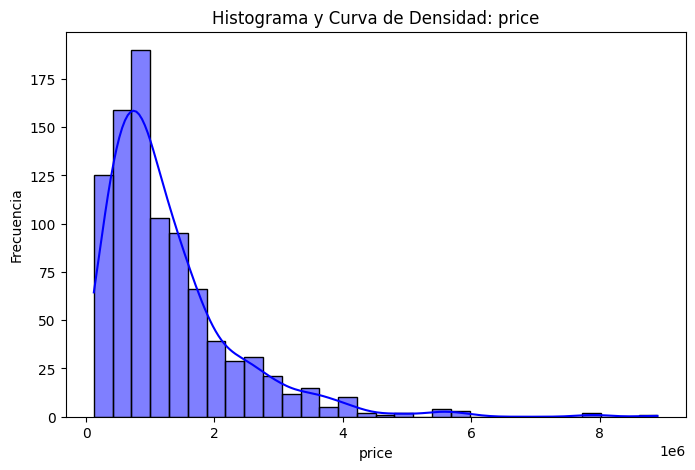

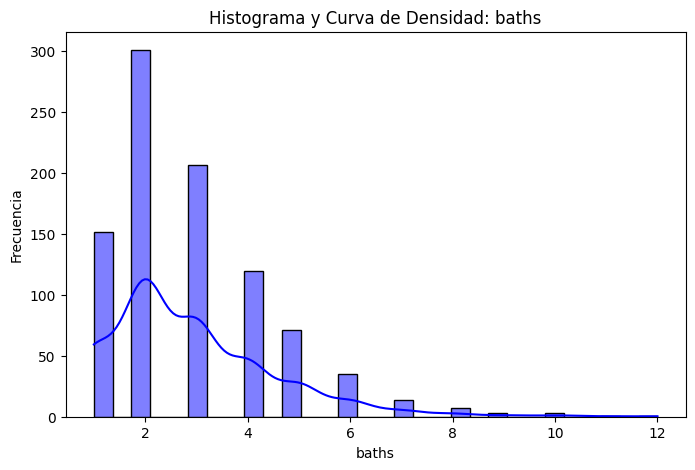

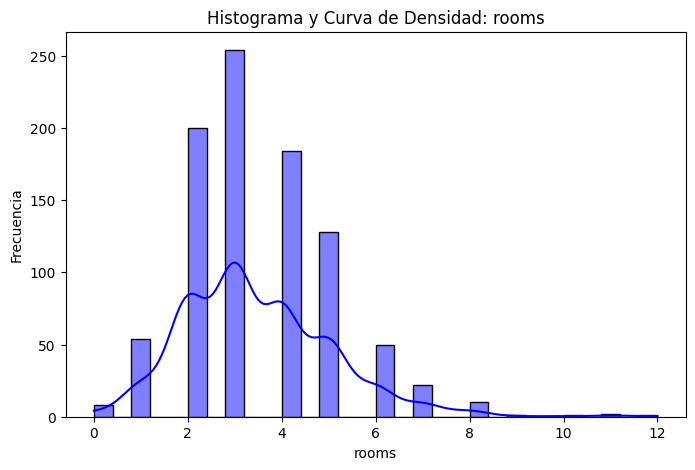

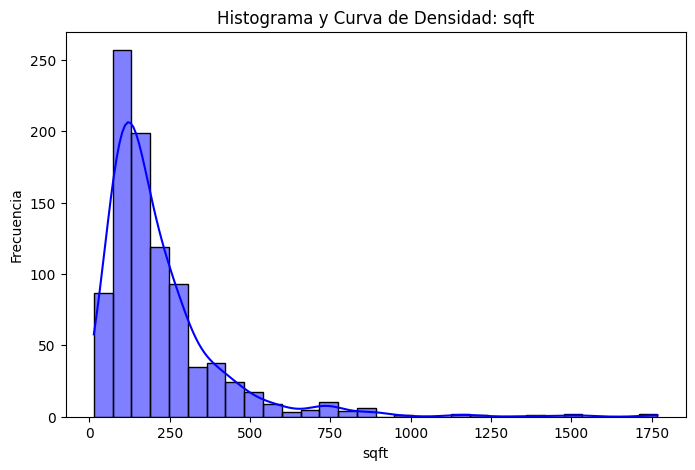


price - Cuartiles y IQR:
Q1: 625000.00, Q2 (mediana): 990000.00, Q3: 1650000.00, IQR: 1025000.00

baths - Cuartiles y IQR:
Q1: 2.00, Q2 (mediana): 3.00, Q3: 4.00, IQR: 2.00

rooms - Cuartiles y IQR:
Q1: 2.00, Q2 (mediana): 3.00, Q3: 4.00, IQR: 2.00

sqft - Cuartiles y IQR:
Q1: 104.00, Q2 (mediana): 158.00, Q3: 264.00, IQR: 160.00

20% más caro: [1850000. 1850000. 1850000. 1850000. 1850000.]...
20% más barato: [122000. 125000. 132000. 137000. 140000.]...

Moda de las direcciones: [('Barrio de Salamanca', 63), ('Hortaleza', 60), ('Chamartín', 54), ('Moncloa', 48), ('Centro', 47)]

price - Varianza: 1073448095137.26, Desviación estándar: 1036073.40

baths - Varianza: 2.64, Desviación estándar: 1.63

rooms - Varianza: 2.54, Desviación estándar: 1.59

sqft - Varianza: 36726.28, Desviación estándar: 191.64


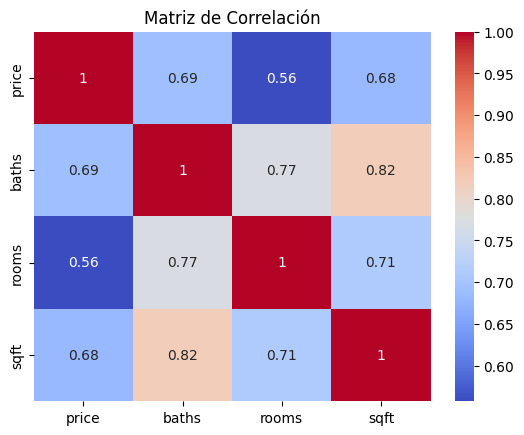


Outliers (Tukey) en Price: [5700000. 3950000. 3900000. 4950000. 7900000.]
Outliers (Z-score) en Price: [5700000. 4950000. 7900000. 5500000. 5500000.]

price - Asimetría: 2.30, Curtosis: 8.55

baths - Asimetría: 1.41, Curtosis: 3.04

rooms - Asimetría: 0.88, Curtosis: 1.90

sqft - Asimetría: 3.36, Curtosis: 17.23

Asimetría de Price (transformado): -0.12

Prueba t de Student - Precio de casas con 3 o más baños vs 1-2 baños:
t-statistic: 21.67, p-value: 0.000
¡Se rechaza la hipótesis nula! Las casas con 3 o más baños son significativamente más caras.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import Counter

# Cargar datos desde archivo CSV con encoding 'utf-8-sig' para eliminar BOM
filename = 'idealista_madrid.csv'
data = np.genfromtxt(filename, delimiter=',', dtype=None, encoding='utf-8-sig', names=True)

# Verificar nombres de las columnas
print("Nombres de las columnas detectadas:", data.dtype.names)

# Renombrar y convertir columnas según nombres detectados
price = data['price'].astype(float)
baths = data['baths'].astype(float)
rooms = data['rooms'].astype(float)
sqft = data['sqft'].astype(float)
addresses = np.char.replace(data['address'], ', Madrid', '')  # Limpiar ", Madrid"

# Estadísticas descriptivas básicas
print("\nMedia:")
print(f"Price: {np.mean(price):.2f}, Baths: {np.mean(baths):.2f}, Rooms: {np.mean(rooms):.2f}, Sqft: {np.mean(sqft):.2f}")
print("\nMediana:")
print(f"Price: {np.median(price):.2f}, Baths: {np.median(baths):.2f}, Rooms: {np.median(rooms):.2f}, Sqft: {np.median(sqft):.2f}")
print("\nMáximo y Mínimo:")
print(f"Price: {np.max(price):.2f} / {np.min(price):.2f}, Baths: {np.max(baths):.2f} / {np.min(baths):.2f}, Rooms: {np.max(rooms):.2f} / {np.min(rooms):.2f}")

# Histograma y curva de densidad
numeric_cols = {'price': price, 'baths': baths, 'rooms': rooms, 'sqft': sqft}

for col_name, col_data in numeric_cols.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(col_data, kde=True, bins=30, color='blue')
    plt.title(f"Histograma y Curva de Densidad: {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frecuencia")
    plt.show()

# Cuartiles y rango intercuartílico (IQR)
for col_name, col_data in numeric_cols.items():
    Q1 = np.percentile(col_data, 25)
    Q2 = np.percentile(col_data, 50)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1
    print(f"\n{col_name} - Cuartiles y IQR:")
    print(f"Q1: {Q1:.2f}, Q2 (mediana): {Q2:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

# Filtrar el 20% más caro y el 20% más barato
price_sorted = np.sort(price)
price_20_percent_high = price_sorted[int(0.8 * len(price_sorted)):]  # 20% más caro
price_20_percent_low = price_sorted[:int(0.2 * len(price_sorted))]   # 20% más barato

print(f"\n20% más caro: {price_20_percent_high[:5]}...")
print(f"20% más barato: {price_20_percent_low[:5]}...")

# Convertir a cadenas con map
addresses = np.char.replace(data['address'], ', Madrid', '')  # Limpiar ", Madrid"
addresses = list(map(str, addresses))  # Usar map para convertir a str

# Moda de la columna address
address_counts = Counter(addresses)
most_common_addresses = address_counts.most_common(5)

# Imprimir las direcciones de manera limpia
print(f"\nModa de las direcciones: {[(address, count) for address, count in most_common_addresses]}")

# Dispersión: varianza y desviación estándar
for col_name, col_data in numeric_cols.items():
    variance = np.var(col_data)
    std_deviation = np.std(col_data)
    print(f"\n{col_name} - Varianza: {variance:.2f}, Desviación estándar: {std_deviation:.2f}")

# Correlación entre las variables
corr_matrix = np.corrcoef([price, baths, rooms, sqft])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['price', 'baths', 'rooms', 'sqft'], yticklabels=['price', 'baths', 'rooms', 'sqft'])
plt.title("Matriz de Correlación")
plt.show()

# Estandarización de las columnas numéricas
price_standardized = (price - np.mean(price)) / np.std(price)
baths_standardized = (baths - np.mean(baths)) / np.std(baths)
rooms_standardized = (rooms - np.mean(rooms)) / np.std(rooms)
sqft_standardized = (sqft - np.mean(sqft)) / np.std(sqft)

# Filtro de outliers: Tukey y Z-score

# Tukey: Usar IQR
def tukey_outliers(col_data):
    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return (col_data < lower_limit) | (col_data > upper_limit)

# Z-score: Definir límite
z_threshold = 3
z_scores = np.abs(stats.zscore(numeric_cols['price']))
outliers_z = z_scores > z_threshold

# Detectar outliers
outliers_tukey_price = tukey_outliers(price)
outliers_z_price = outliers_z

# Mostrar resultados
print("\nOutliers (Tukey) en Price:", price[outliers_tukey_price][:5])
print("Outliers (Z-score) en Price:", price[outliers_z_price][:5])

# Asimetría y Curtosis
for col_name, col_data in numeric_cols.items():
    skewness = stats.skew(col_data)
    kurtosis = stats.kurtosis(col_data)
    print(f"\n{col_name} - Asimetría: {skewness:.2f}, Curtosis: {kurtosis:.2f}")

# Transformación logarítmica (para distribuciones sesgadas)
price_transformed = np.log(price)

# Verificación de asimetría después de la transformación
price_skewness_transformed = stats.skew(price_transformed)
print(f"\nAsimetría de Price (transformado): {price_skewness_transformed:.2f}")

# Contraste de hipótesis: 
# Comparar precios de casas con 3 o más baños contra casas con 1-2 baños

# Dividir por número de baños
baths_3_or_more = price[baths >= 3]
baths_1_or_2 = price[baths < 3]

# Prueba t de Student
t_stat, p_value = stats.ttest_ind(baths_3_or_more, baths_1_or_2)

print(f"\nPrueba t de Student - Precio de casas con 3 o más baños vs 1-2 baños:")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.3f}")

# Si p-value < 0.05, rechazamos H0 (hipótesis nula) y concluimos que hay diferencia significativa
if p_value < 0.05:
    print("¡Se rechaza la hipótesis nula! Las casas con 3 o más baños son significativamente más caras.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencia significativa en los precios.")